# HW 5

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import numpy as np
from scipy.stats import truncnorm

In [2]:
student = max(2, 10-2)
student

8

**Fit a lognormal distribution to the measurements of maximal flowrate**
* **check that a lognormal distribution fits this data well, using a quantile-quantile  plot**

In [3]:
observations = [111*student, 73*student, 57*student, 106*student, 134*student, 265*student, 295*student, 
               89*student, 71*student, 119*student, 52*student, 63*student, 212*student, 106*student, 
               29*student, 217*student, 172*student, 84*student, 131*student]

In [4]:
observations

[888,
 584,
 456,
 848,
 1072,
 2120,
 2360,
 712,
 568,
 952,
 416,
 504,
 1696,
 848,
 232,
 1736,
 1376,
 672,
 1048]

(array([2., 4., 4., 4., 0., 1., 1., 1., 1., 1.]),
 array([ 232. ,  444.8,  657.6,  870.4, 1083.2, 1296. , 1508.8, 1721.6,
        1934.4, 2147.2, 2360. ]),
 <a list of 10 Patch objects>)

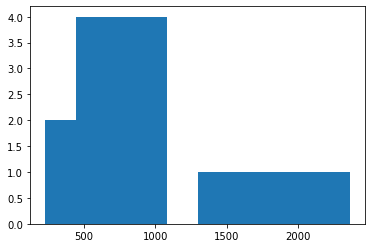

In [5]:
plt.hist(observations)

In [6]:
shape, loc, scale = stats.lognorm.fit(observations)
shape, loc, scale

(0.5607743787926187, -28.383386688729605, 886.4495909784939)

((array([ 294.42996695,  385.03485473,  453.48665197,  513.61258454,
          570.09608771,  625.23468423,  680.49241975,  737.00920895,
          795.83297569,  858.06620429,  924.99841111,  998.2699698 ,
         1080.12232081, 1173.8368583 , 1284.59878056, 1421.42974673,
         1602.33198117, 1872.33796186, 2405.81850889]),
  array([ 232,  416,  456,  504,  568,  584,  672,  712,  848,  848,  888,
          952, 1048, 1072, 1376, 1696, 1736, 2120, 2360])),
 (1.0760779174624526, -53.15528942842218, 0.9881264939176173))

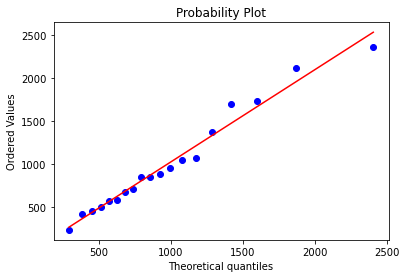

In [7]:
stats.probplot(observations, dist=scipy.stats.lognorm(shape,loc,scale),  plot=plt.figure().add_subplot(111))

**Calculate the average height of the river by making a deterministic  calculation**
* **use median values for each uncertain parameter**

Truncated normal 𝒩(3*(#student+1), *(#student+1 ) on [3*(#student+1, +∞].

I take 4, as a missing number before *.

𝒩(27, 36)

In [13]:
Q = np.array([stats.lognorm(shape,loc,scale).rvs() for i in range(100)])
Ks = np.array([max(truncnorm(27, 36).rvs(), 27) for i in range(100)])
Zv = np.array([np.random.triangular(49, 50, 51) for i in range(100)])
Zm = np.array([np.random.triangular(54, 55, 56) for i in range(100)])
L = 500 * student
B = 30 * student

In [14]:
Zc = (np.median(Q) / (np.median(Ks) * B * np.sqrt((np.median(Zm) - np.median(Zv)) / L))) ** (3 / 5)
Zc

2.5278414808821803

**Produce a histogram of possible water levels, given the input uncertainty, using a Monte Carlo approach**

**Estimate the 100-year flood level for this river**
* **note: specialists use the term 0.01 annual exceedance probability flood,  meaning a flood that has a 1% chance of happening in any given year**

In [15]:
def water_level():
    Zc = (stats.lognorm(shape,loc,scale).rvs() / ( max(truncnorm(27, 36).rvs(), 27) * B * 
          np.sqrt((np.random.triangular(54, 55, 56) - np.random.triangular(49, 50, 51)) / L))) ** (3 / 5)
    return Zc

MC = np.array([water_level() for i in range(100)])

(array([ 8., 25., 19., 12., 14., 10.,  7.,  1.,  2.,  2.]),
 array([0.95943885, 1.33202443, 1.70461002, 2.0771956 , 2.44978119,
        2.82236677, 3.19495236, 3.56753794, 3.94012352, 4.31270911,
        4.68529469]),
 <a list of 10 Patch objects>)

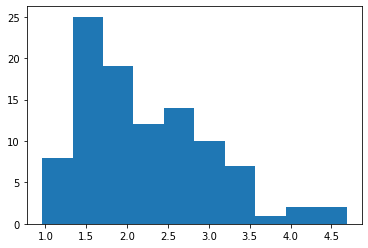

In [16]:
plt.hist(MC)

In [17]:
np.percentile(MC, 99)

4.499382979374417